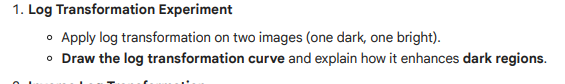

# Log Transformation Function


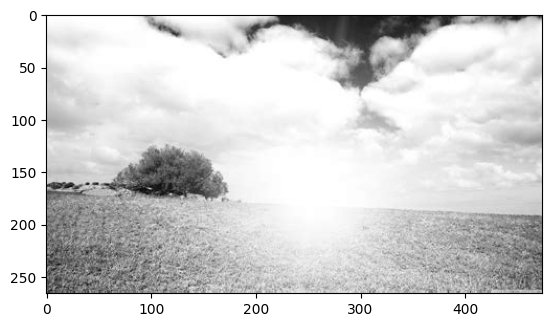

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


bright_img = cv2.imread('brighter.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(bright_img, cmap='gray')
plt.show()

In [ ]:

def log_transform(image):
    image = image.astype(np.float32)
    c = 255 / np.log(1 + np.max(image))
    log_img = c * np.log(1 + image)
    log_img = cv2.normalize(log_img, None, 0, 255, cv2.NORM_MINMAX)
    return log_img.astype(np.uint8)


# Apply Log Transformation to both images
log_bright_img = log_transform(bright_img)


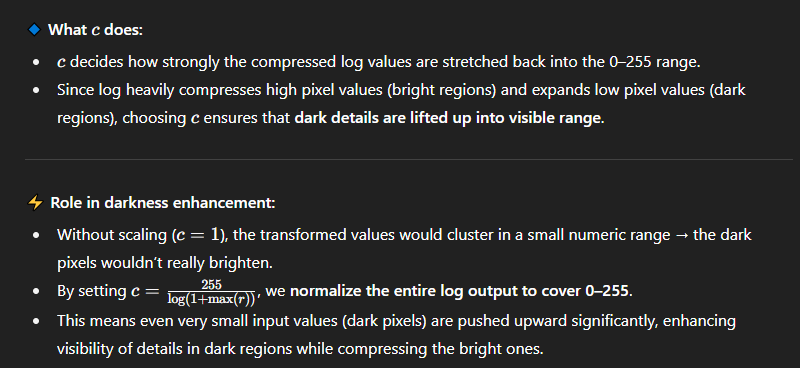

# Bright Image Results

Text(0.5, 1.0, 'Log Curve')

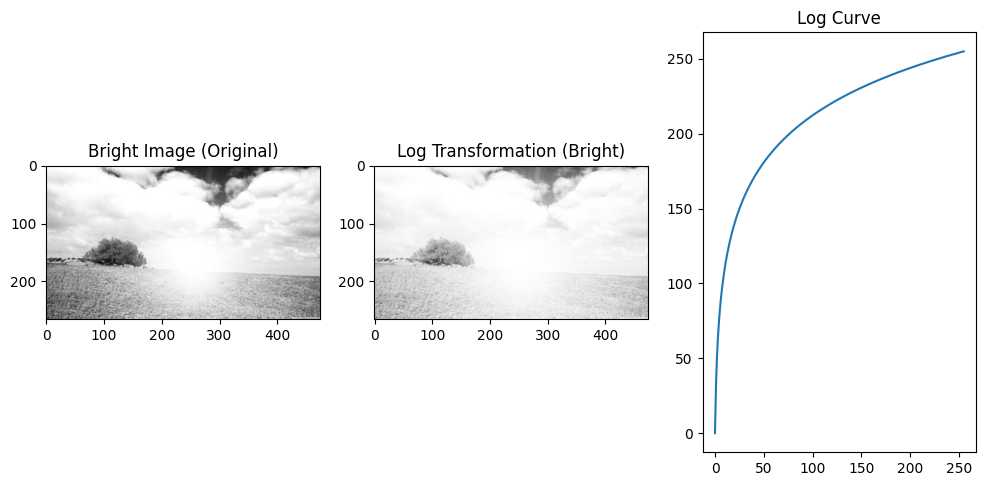

In [ ]:
# Plot the results for Log Transformation
plt.figure(figsize=(12, 12))


plt.subplot(2, 3, 1)
plt.imshow(bright_img, cmap='gray')
plt.title("Bright Image (Original)")

plt.subplot(2, 3, 2)
plt.imshow(log_bright_img, cmap='gray')
plt.title("Log Transformation (Bright)")

plt.subplot(2, 3, 3)
plt.plot(np.arange(256), [255/np.log(1+255)*np.log(1+i) for i in range(256)])
plt.title("Log Curve")

#Plot Observation

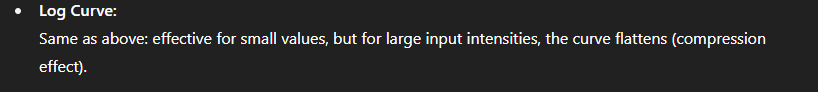

# Dark Image Results

In [ ]:

dark_img = cv2.imread('boat-image.jpeg', cv2.IMREAD_GRAYSCALE)
log_dark_img = log_transform(dark_img)


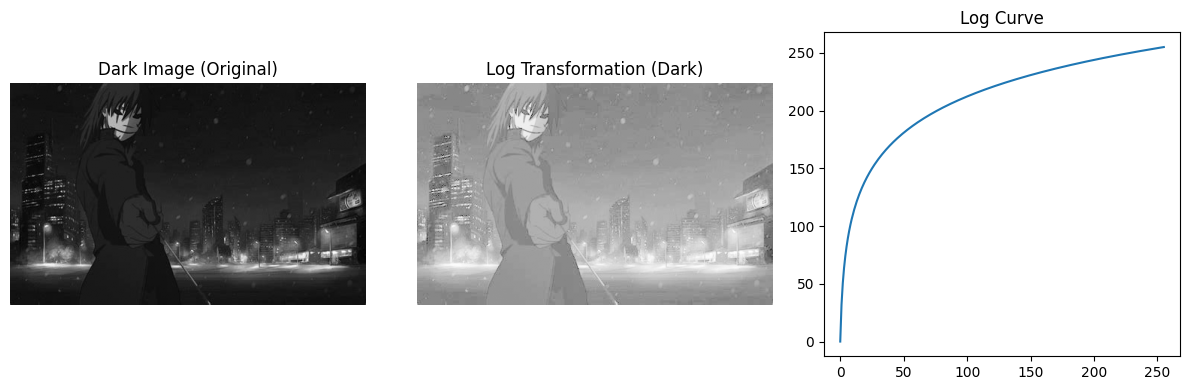

In [ ]:

plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.imshow(dark_img, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(log_dark_img, cmap='gray')
plt.title("Log Transformation (Dark)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.plot(np.arange(256), [255/np.log(1+255)*np.log(1+i) for i in range(256)])
plt.title("Log Curve")

plt.tight_layout()
plt.show()


#Plot Observation:

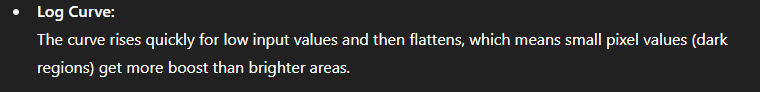

The formula is:

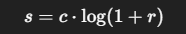

Here, r is the input pixel, and c is just a scaling constant. The key point is that the logarithm function grows very fast at low values of r, but then it gradually slows down for larger values.


1.For dark regions (small pixel values), even a tiny difference gets stretched out. That means hidden textures in shadows suddenly become visible.

2.For bright regions, since the curve flattens, their intensity is compressed, preventing overexposure.

So overall, log transformation brightens dark areas and enhances hidden details, while controlling bright areas.

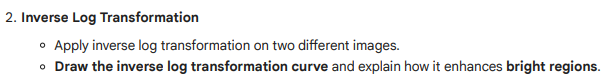


# Inverse Log Transformation Function

In [ ]:


def inverse_log_transform(image):
    image = image.astype(np.float32)
    c = 255 / np.log(1 + 255)
    inv_img = np.exp(image / c) - 1
    inv_img = cv2.normalize(inv_img, None, 0, 255, cv2.NORM_MINMAX)
    return inv_img.astype(np.uint8)

# Apply Inverse Log Transformation to both Log-transformed images
inv_log_bright_img = inverse_log_transform(bright_img)
inv_log_dark_img = inverse_log_transform(dark_img)



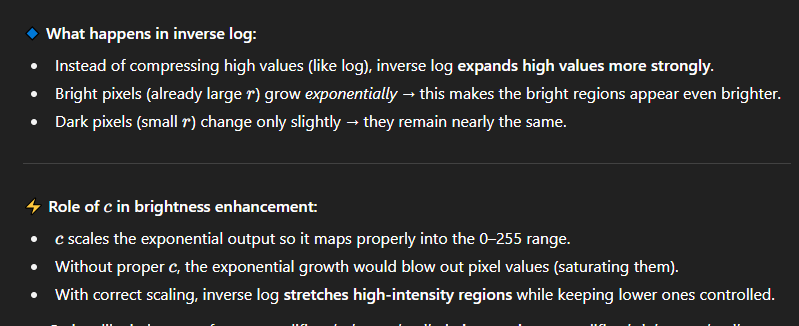

# Bright Image Results

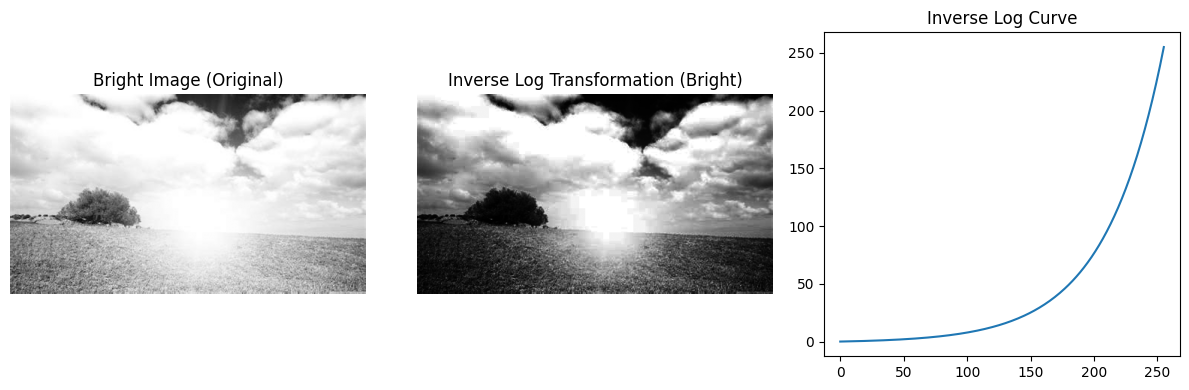

In [ ]:

plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.imshow(bright_img, cmap='gray')
plt.title("Bright Image (Original)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(inv_log_bright_img, cmap='gray')
plt.title("Inverse Log Transformation (Bright)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.plot(np.arange(256), [(np.exp(i/(255/np.log(1+255))) - 1) for i in range(256)])
plt.title("Inverse Log Curve")

plt.tight_layout()
plt.show()


#Plot Observation

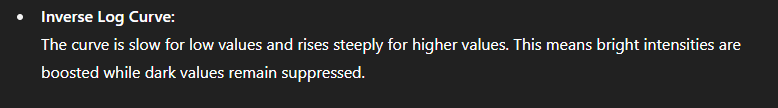

# Dark Image Results

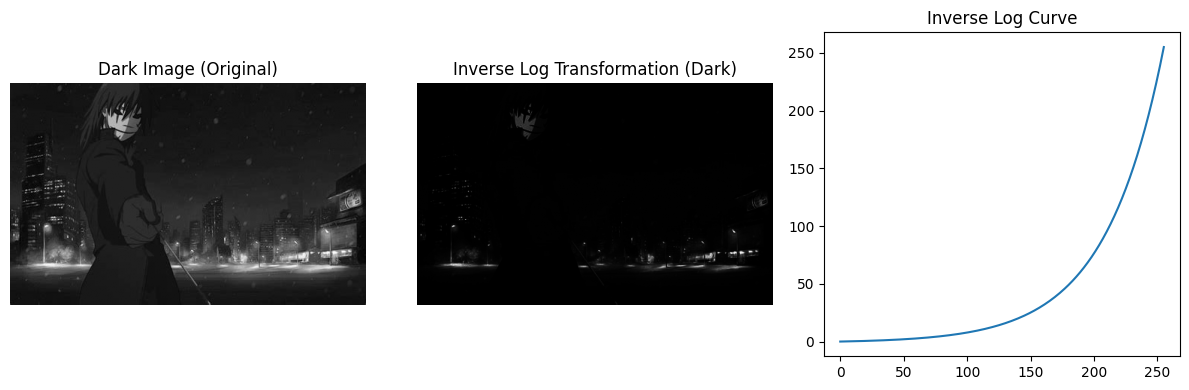

In [ ]:

plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.imshow(dark_img, cmap='gray')
plt.title("Dark Image (Original)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(inv_log_dark_img, cmap='gray')
plt.title("Inverse Log Transformation (Dark)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.plot(np.arange(256), [(np.exp(i/(255/np.log(1+255))) - 1) for i in range(256)])
plt.title("Inverse Log Curve")

plt.tight_layout()
plt.show()


#Plot Observation

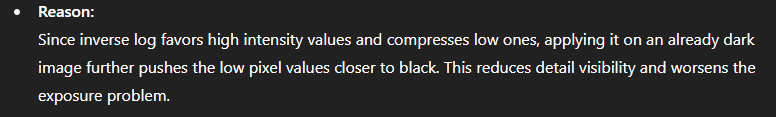

For Inverse Log Transformation, its formula is:

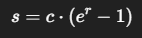

This works in the opposite way. Here, the exponential function grows very slowly for small values but very fast for larger values.


1.For dark regions, small pixel values remain compressed. So shadows don’t change much.

2.For bright regions, higher values are spread apart significantly, which helps reveal fine details in overexposed or bright areas.

#Conclusion

Through this lab, I learned that log transformation is effective for enhancing dark images by brightening low-intensity regions and revealing hidden details, while inverse log transformation works better for bright images by emphasizing high-intensity areas and improving contrast. I also observed that using the wrong transformation can worsen image quality, which taught me the importance of selecting the right technique based on the image type.